In [3]:
!unzip '/content/drive/MyDrive/ML ITHUB осень/ДИ 2024/IT-СИП-22-23-DATA-ML/data/plates.zip'

Archive:  /content/drive/MyDrive/ML ITHUB осень/ДИ 2024/IT-СИП-22-23-DATA-ML/data/plates.zip
   creating: plates/
  inflating: plates/.DS_Store        
   creating: __MACOSX/
   creating: __MACOSX/plates/
  inflating: __MACOSX/plates/._.DS_Store  
   creating: plates/test/
  inflating: plates/test/0071.jpg    
  inflating: plates/test/0717.jpg    
  inflating: plates/test/0703.jpg    
  inflating: plates/test/0065.jpg    
  inflating: plates/test/0059.jpg    
  inflating: plates/test/0515.jpg    
  inflating: plates/test/0273.jpg    
  inflating: plates/test/0267.jpg    
  inflating: plates/test/0501.jpg    
  inflating: plates/test/0529.jpg    
  inflating: plates/test/0298.jpg    
  inflating: plates/test/0461.jpg    
  inflating: plates/test/0307.jpg    
  inflating: plates/test/0313.jpg    
  inflating: plates/test/0475.jpg    
  inflating: plates/test/0449.jpg    
  inflating: plates/test/0105.jpg    
  inflating: plates/test/0663.jpg    
  inflating: plates/test/0677.jpg    
  in

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [5]:
#вводим переменные
image_size = (150, 150) #размер, к которому будем приводить каждую картинку

data_dir = '/content/plates/train' #путь к папке

class_names = ['cleaned','dirty']

In [6]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)

    random_image = random.choice(os.listdir(target_folder))

    img = mpimg.imread(os.path.join(target_folder, random_image))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (256, 341, 3)


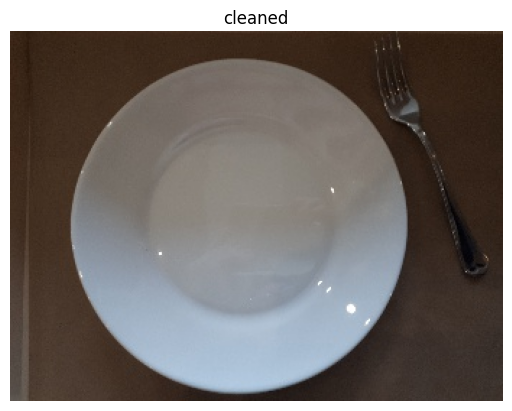

In [10]:
img = view_random_image(data_dir,"cleaned")

## Структура сверточной нейронной сети

Принцип действия сверточных нейронных сетей заключается в извлечении обучаемых признаков (локальных особенностей, локальных дескрипторов) изображения. В результате такая нейронная сеть может автоматически строить карты высококачественных визуальных признаков. Можно пойти глубже и извлекать не просто признаки, а признаки в пространстве признаков предшествующего уровня, другими словами, иерархию признаков. Так создается глубокая сверточная нейронная сеть и высокоуровневая карта признаков на выходе, где каждый нейрон соответствует уже более сложному элементу изображения.

* Теория - https://practicum.yandex.ru/blog/svertochnye-neyronnye-seti/
* Немного практики - https://proproprogs.ru/neural_network/delaem-svertochnuyu-neyronnuyu-set-v-keras

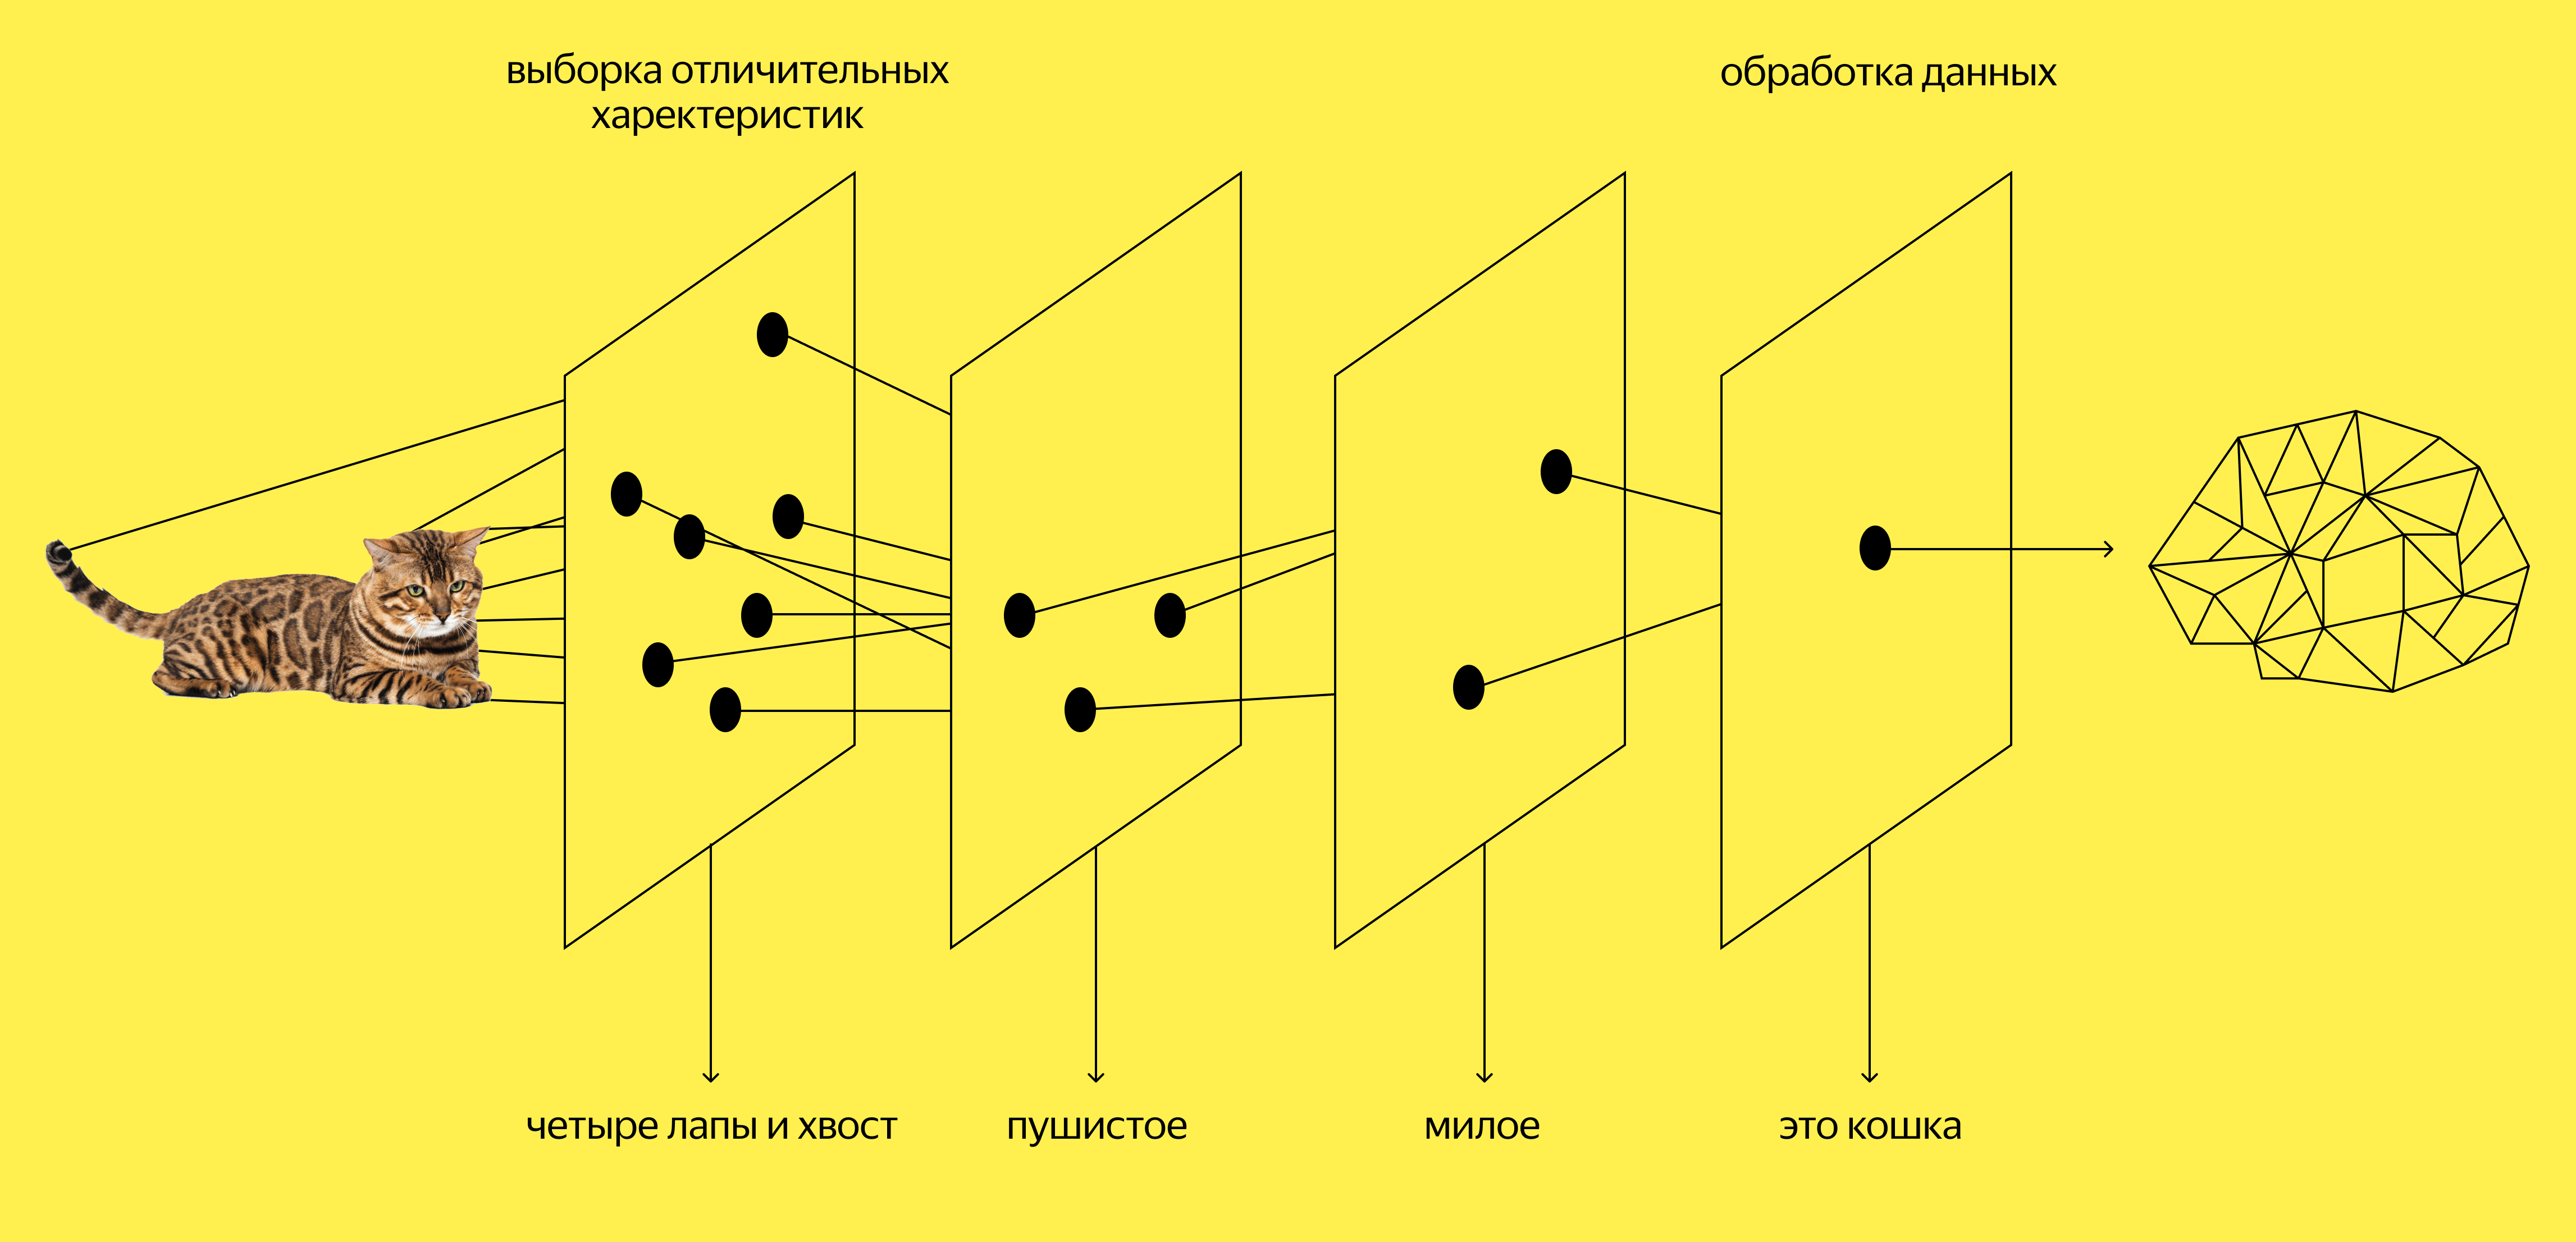

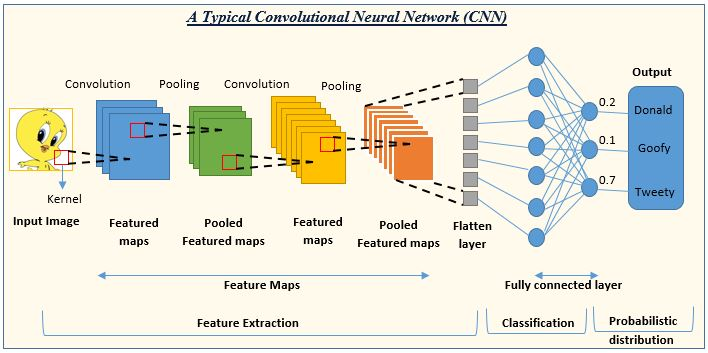

## Алгоритм построения

**Импорт библиотек и установка начального числа:**
Импорт TensorFlow и необходимых модулей для генерации данных изображений.
Установка случайного начального числа с помощью tf.random.set_seed(42) обеспечивает воспроизводимость результатов.

**Предварительная обработка данных (нормализация):**
Изображения обычно представляются как значения пикселей в диапазоне от 0 до 255.
Чтобы подготовить данные для обучения, значения пикселей масштабируются и нормализуются путем деления на 255. Этот шаг имеет решающее значение для обеспечения того, чтобы все входные значения попадали в диапазон [0, 1].

**Каталоги данных и генераторы данных:**
Определите каталоги для данных обучения и тестирования.
Создайте генераторы данных с помощью ImageDataGenerator для загрузки и предварительной обработки изображений из этих каталогов.
Укажите такие параметры, как размер пакета, размер целевого изображения и режим класса (в данном случае двоичная классификация).

**Архитектура модели CNN:**
Создайте последовательную модель с помощью API Keras TensorFlow.
Модель состоит из нескольких слоев:
Сверточные слои: эти слои применяют операции свертки для извлечения признаков из входных изображений. Математическая операция здесь — это 2D-свертка, которая использует ядро ​​(фильтр) для сканирования входного изображения.
Функция активации (ReLU): ReLU (Rectified Linear Unit) применяется поэлементно для введения нелинейности.
Слои максимального пула: эти слои уменьшают пространственные размеры карт признаков, выбирая максимальное значение из области. Максимальное пуло снижает вычислительную нагрузку и обеспечивает инвариантность трансляции.
Слой сглаживания: этот слой преобразует выходные данные сверточных слоев в одномерный вектор для ввода в полностью связанные слои.
Полностью связанный слой: последний слой состоит из одного нейрона с сигмоидной функцией активации для бинарной классификации. Выходными данными является вероятность принадлежности входного изображения к определенному классу (например, «стейк» или «не стейк»).

**Компиляция модели:**
Укажите функцию потерь, алгоритм оптимизации и метрику оценки.
Функция потерь — это бинарная кросс-энтропия, обычно используемая для задач бинарной классификации.
Оптимизатор — Adam, который является эффективным алгоритмом оптимизации для обучения нейронных сетей.
Метрика, используемая для оценки, — точность.

**Обучение модели:**
Обучите модель с помощью метода подгонки с генератором обучающих данных.
Модель обучается в течение указанного количества эпох (5 в этом коде).
Данные проверки предоставляются для оценки производительности модели на невидимых данных.
Переменная history_1 хранит информацию о процессе обучения, включая потерю обучения и проверки и точность по эпохам.

Подводя итог, код настраивает модель CNN для классификации бинарных изображений. Он предварительно обрабатывает данные, определяет архитектуру модели, компилирует модель и обучает ее с помощью стохастического градиентного спуска с оптимизатором Adam. Модель оценивается на основе метрик потери и точности бинарной кросс-энтропии.

## Первая модель

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)

# предварительная обработка данных (масштабирование и нормализация)
datagen = ImageDataGenerator(rescale=1/255.)


# data generators
batch_size = 5
class_mode = 'binary'
train_data = datagen.flow_from_directory(data_dir, batch_size=batch_size, target_size=image_size, class_mode=class_mode, seed=42)
#valid_data = datagen.flow_from_directory(test_dir, batch_size=batch_size, target_size=image_size, class_mode=class_mode, seed=42) у нас нет такой

# создаем модель
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# обучаем
epochs = 10
history_1 = model_1.fit(train_data, epochs=epochs)

Found 40 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4689 - loss: 0.6974
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4353 - loss: 0.6942
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6621 - loss: 0.6799 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5335 - loss: 0.6640 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6766 - loss: 0.6274 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7899 - loss: 0.5839 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8102 - loss: 0.5404 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7804 - loss: 0.4810 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9208 - loss: 0.3637 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8846 - loss: 0.3640 


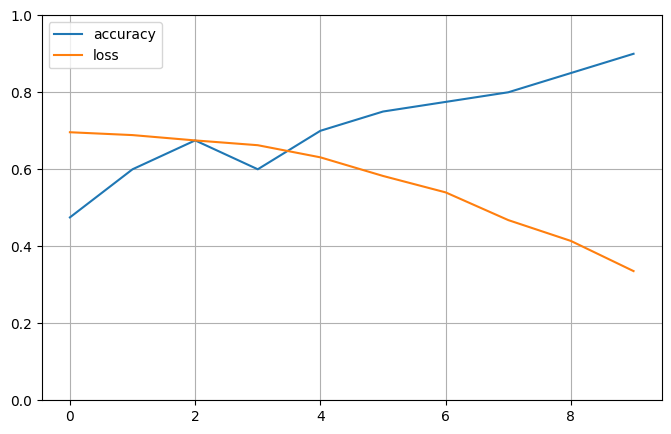

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Вторая модель. Аугментация данных

In [ ]:
# создаем экземпляр ImageDataGenerator с необходимыми параметрами аугментации
datagen_augment = ImageDataGenerator(
    rotation_range=20,  # случайный поворот изображения на угол в диапазоне от 0 до 20 градусов
    width_shift_range=0.2,  # случайный сдвиг по горизонтали на 20% от ширины изображения
    height_shift_range=0.2,  # случайный сдвиг по вертикали на 20% от высоты изображения
    shear_range=0.2,  # случайное сжатие/растяжение
    zoom_range=0.2,  # случайный зум (увеличение/уменьшение)
    horizontal_flip=True,  # случайное горизонтальное отражение
    vertical_flip=False,  # случайное вертикальное отражение (отключено)
    fill_mode='nearest'  # режим заполнения новых пикселей, появляющихся после преобразования
)

# применяем аугментацию к набору данных
train_data_augment = datagen_augment.flow_from_directory(data_dir, batch_size=batch_size, target_size=image_size, class_mode=class_mode, seed=42)

# создаем модель
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# обучаем
epochs = 10
history_2 = model_2.fit(train_data, epochs=epochs)

Found 40 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3923 - loss: 0.7638
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5990 - loss: 0.6786 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4402 - loss: 0.6906 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6138 - loss: 0.6438  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6529 - loss: 0.6321 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7848 - loss: 0.6259 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6621 - loss: 0.6080 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7846 - loss: 0.5477  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8536 - loss: 0.4598 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9646 - loss: 0.3266 


## Третья модель. Не хочу генераторы, давайте тупо массивы гонять

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(150,150,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),batch_size=batch_size)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4645 - loss: 1.2159
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4473 - loss: 0.6935 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 0.6934  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4978 - loss: 0.6932 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4829 - loss: 0.6933  
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


## ЛР Классификация изображений - сдаемся 5.05 - 7.05

* требования к набору данных - минимум 100 изображений (но чем больше, тем лучше)
* аугментация изображений (повороты, зум, контрастность) - минус 2 балла за использование дефолтных параметров (те, которые даны у меня в записке)
* построение 3 моделей разных архитектур (количество слоев/нейронов) - проверить качество каждой из моделей на валидационной/тестовой выборках - какая из моделей оказалась лучше?
* классика жанра - confusion_matrix and classification_report со всеми выводами